In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Custom module created to fit and evaluate different ML Models
from ApplyML import apply_classification_model, get_classification_model

In [3]:
# Read the dataset
star_dataset = pd.read_csv(r"Datasets\pulsar_stars.csv")

In [4]:
# Total rows and columns in the dataset
star_dataset.shape

(17898, 9)

In [5]:
# Glimpse of the dataset
star_dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
# Basic Statistics about the features
star_dataset.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


Hmm, we can see most of the features have very high deviation from the mean value. We will handle this later in the study.

In [7]:
# Set the dependent and independent variables
X = star_dataset.drop('target_class', axis = 1)
y = star_dataset['target_class']

In [8]:
X

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [9]:
x_columns = X.columns

In [10]:
y

0        0
1        0
2        0
3        0
4        0
        ..
17893    0
17894    0
17895    0
17896    0
17897    0
Name: target_class, Length: 17898, dtype: int64

# Handle variance in the dataset

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
scaled_x_df = pd.DataFrame(X_scaled, columns = x_columns)

In [14]:
scaled_x_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


In [15]:
scaled_x_df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04,1.789800e+04
mean,5.935084e-17,-3.368508e-16,2.218213e-16,-3.557391e-16,-1.192972e-16,6.056664e-17,4.345613e-16,3.182602e-16
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00
min,-4.103640e+00,-3.182449e+00,-2.212262e+00,-5.775478e-01,-4.207776e-01,-9.736032e-01,-2.539483e+00,-1.003034e+00
25%,-3.956882e-01,-6.098955e-01,-4.236418e-01,-3.175961e-01,-3.627611e-01,-6.106403e-01,-5.597136e-01,-6.562405e-01
50%,1.558601e-01,5.815398e-02,-2.392997e-01,-2.548046e-01,-3.329443e-01,-4.039644e-01,2.884145e-02,-2.046083e-01
75%,6.239604e-01,6.537588e-01,-4.259430e-03,-1.365972e-01,-2.426074e-01,1.079397e-01,5.324947e-01,3.234543e-01
max,3.178564e+00,7.632529e+00,7.134956e+00,1.075456e+01,7.151778e+00,4.330538e+00,5.822567e+00,1.019742e+01


Cool, since now we have our dataset scaled, let's apply different ML Models and evaluate results.

# Fit and Evaluate Different Machine Learning Algorithms

In [16]:
# Split the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25)

In [17]:
apply_classification_model('LR', x_train,x_test,y_train,y_test)

Fitting and evaluating the LR model to the dataset.
ROC-AUC Score for test set - 0.9069514265354317
Accuracy for test set - 97.87709497206704
Accuracy for training set - 97.86932876406168


In [18]:
apply_classification_model('DT', x_train,x_test,y_train,y_test)

Fitting and evaluating the DT model to the dataset.
ROC-AUC Score for test set - 0.9084818117036464
Accuracy for test set - 96.93854748603353
Accuracy for training set - 100.0


In [19]:
apply_classification_model('SVM', x_train,x_test,y_train,y_test)

Fitting and evaluating the SVM model to the dataset.
ROC-AUC Score for test set - 0.9067057866435133
Accuracy for test set - 97.83240223463687
Accuracy for training set - 97.90657826119347


In [20]:
apply_classification_model('NB', x_train,x_test,y_train,y_test)

Fitting and evaluating the NB model to the dataset.
ROC-AUC Score for test set - 0.895595141680712
Accuracy for test set - 94.39106145251397
Accuracy for training set - 94.51687402220071


In [21]:
apply_classification_model('KNN', x_train,x_test,y_train,y_test)

Fitting and evaluating the KNN model to the dataset.
ROC-AUC Score for test set - 0.8912307774624184
Accuracy for test set - 97.6536312849162
Accuracy for training set - 98.51002011472845


In [22]:
apply_classification_model('XGB', x_train,x_test,y_train,y_test)

Fitting and evaluating the XGB model to the dataset.
ROC-AUC Score for test set - 0.9177310048617242
Accuracy for test set - 97.81005586592178
Accuracy for training set - 99.87335170975193


We can clearly see all the models have shown better scores for the training and test set.

# Feature Selection using RFE- Recursive Feature Elimination

Currently we have used all the 8 features for the classification problem, let's see if we can reduce these features without compromising much on accuracy. 

In [23]:
from sklearn.feature_selection import RFE

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [28]:
def apply_rfe_for_feature_selection(estimator, feature_to_select, x_train, x_test, y_train, y_test):
    print('*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
    print(f'Reducing the number of features to {feature_to_select}')
    rfe = RFE(estimator, n_features_to_select= feature_to_select, verbose= 1)
    rfe.fit(x_train, y_train)
    print(f'Columns identified best for classification - {scaled_x_df.columns[rfe.support_]}')
    y_pred_test_rfe = rfe.predict(x_test)
    y_pred_train_rfe = rfe.predict(x_train)
    return print_and_return_scores(y_test, y_train, y_pred_test_rfe, y_pred_train_rfe)

In [29]:
def print_and_return_scores(y_test, y_train, y_pred_test, y_pred_train):
    training_score = accuracy_score(y_train,y_pred_train)
    test_score = accuracy_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test,y_pred_test)
    print(f'Accuracy score for training set - {training_score}')
    print(f'Accuracy score for test set - {test_score}')
    print(f'ROC-AUC for test set - {roc_auc_test}')
    return (training_score, test_score, roc_auc_test)

In [30]:
# Reduce the features to 1 and visualize the effect on the scores
training_scores = []
test_scores = []
roc_auc_test_scores = []
for required_features in range(7,0,-1):
    result = apply_rfe_for_feature_selection(get_classification_model("XGB"), required_features, x_train, x_test,y_train,y_test)
    training_scores.append(result[0])
    test_scores.append(result[1])
    roc_auc_test_scores.append(result[2])

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Reducing the number of features to 7
Fitting estimator with 8 features.
Columns identified best for classification - Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')
Accuracy score for training set - 0.9981375251434106
Accuracy score for test set - 0.9796648044692737
ROC-AUC for test set - 0.9197055482998557
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Reducing the number of features to 6
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Columns identified best for classification - Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Mean of the DM-SNR curv

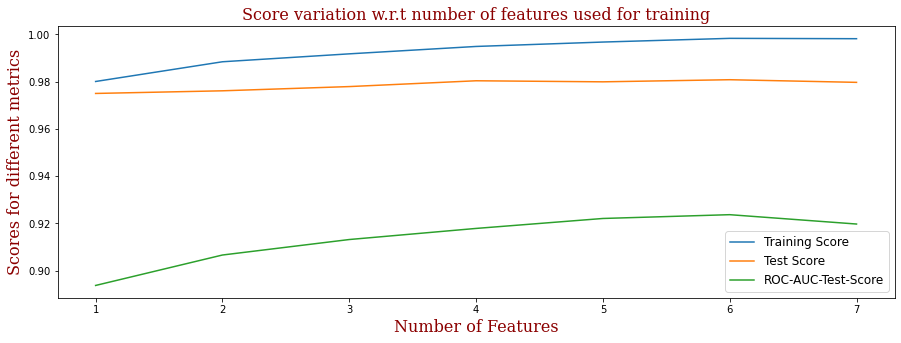

In [31]:
# Visualize the results for better understanding
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
f, ax = plt.subplots(figsize=(15, 5))
plt.plot(range(7,0,-1), training_scores, label = 'Training Score')
plt.plot(range(7,0,-1), test_scores, label = 'Test Score')
plt.plot(range(7,0,-1), roc_auc_test_scores, label = 'ROC-AUC-Test-Score')
plt.xlabel('Number of Features', fontdict= font)
plt.ylabel('Scores for different metrics', fontdict= font)
plt.title('Score variation w.r.t number of features used for training', fontdict= font)
plt.legend(fontsize = 'large')
plt.show()

We can see that reducing the features has no impact on the test score, training score is reduced a little. However, ROC_AUC score has shown more variation as we have reduced the features from 7 to 1. Based on the above diagram, we can use 3-4 features for our problem with not much impact on the scores.